In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))  
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(SeuratData))

addArchRGenome("hg19")


Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

In [2]:
SeuratData::InstallData("ifnb")
SeuratData::LoadData("ifnb")

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning me

An object of class Seurat 
14053 features across 13999 samples within 1 assay 
Active assay: RNA (14053 features, 0 variable features)

In [3]:
mat <- GetAssayData(ifnb, slot="counts")
colnames(mat) <- paste0(ifnb$stim, "#", colnames(mat))
rownames(ifnb@meta.data) <- colnames(mat)

In [4]:
proj <- ArchRNA::Matrix2ArchRProject(mat=mat, name=c("CTRL", "STIM"), meta.data = ifnb@meta.data,outputDirectory = "ifnb", addHashtag = F)

Using GeneAnnotation set by addArchRGenome(Hg19)!

Overlap Per Sample w/ scATAC : CTRL=6548

2022-10-31 12:40:14 : 

2022-10-31 12:40:14 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-10-31 12:40:15 : Adding data to GeneExpressionMatrix !, 0.004 mins elapsed.

2022-10-31 12:40:16 : Adding counts to GeneExpressionMatrix !, 0.031 mins elapsed.

Using GeneAnnotation set by addArchRGenome(Hg19)!

Overlap Per Sample w/ scATAC : STIM=7451

2022-10-31 12:40:19 : 

2022-10-31 12:40:19 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-10-31 12:40:19 : Adding data to GeneExpressionMatrix !, 0.005 mins elapsed.

2022-10-31 12:40:21 : Adding counts to GeneExpressionMatrix !, 0.034 mins elapsed.

Using GeneAnnotation set by addArchRGenome(Hg19)!

Using GeneAnnotation set by addArchRGenome(Hg19)!

Validating Arrows...

Getting SampleNames...

1 
2 


Copying ArrowFiles to Ouptut Directory! If you want to save disk space set copyArrows = FALSE

1 
2 


Getting Cell Metadata...

1 
2 



In [5]:
proj <- addRNAIterativeLSI(proj) 

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-3b691d6240b83e-Date-2022-10-31_Time-12-40-32.log
If there is an issue, please report to github with logFile!

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”
2022-10-31 12:40:32 : Computing Variability Across All Features, 0 mins elapsed.

2022-10-31 12:40:33 : Computing Variable Features, 0.022 mins elapsed.

###########
2022-10-31 12:40:34 : Running LSI (1 of 2) on Top Features, 0.035 mins elapsed.
###########

2022-10-31 12:40:34 : Sampling Cells (N = 10001) for Estimated LSI, 0.036 mins elapsed.

2022-10-31 12:40:34 : Creating Sampled Partial Matrix, 0.036 mins elapsed.

2022-10-31 12:40:36 : Computing Estimated LSI (projectAll = FALSE), 0.072 mins elapsed.

2022-10-31 12:40:44 : Identifying Cluster

In [6]:
proj <- addHarmony(proj, reducedDims = "RNAIterativeLSI", groupBy = "Sample")

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations



In [7]:
proj <- addUMAP(proj, reducedDims = "Harmony", verbose = F, force = T) 

12:41:44 Creating temp model dir /tmp/Rtmp8i4Xcd/dir3b691d59bfac76

12:41:44 Creating dir /tmp/Rtmp8i4Xcd/dir3b691d59bfac76

12:41:46 Changing to /tmp/Rtmp8i4Xcd/dir3b691d59bfac76

12:41:46 Creating /data/sz753404/git_code/ArchRNA/vignettes/ifnb/Embeddings/Save-Uwot-UMAP-Params-Harmony-3b691d50fb062a-Date-2022-10-31_Time-12-41-44.tar



In [8]:
proj <- addClusters(proj, reducedDims = "Harmony", biasCol = "Gex_nUMI")

ArchR logging to : ArchRLogs/ArchR-addClusters-3b691d2eb573a2-Date-2022-10-31_Time-12-41-46.log
If there is an issue, please report to github with logFile!

2022-10-31 12:41:46 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 501223

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 14
Elapsed time: 1 seconds


2022-10-31 12:42:04 : Testing Biased Clusters, 0.295 mins elapsed.

2022-10-31 12:42:04 : Testing Outlier Clusters, 0.295 mins elapsed.

2022-10-31 12:42:04 : Assigning Cluster Names to 14 Clusters, 0.295 mins elapsed.

2022-10-31 12:42:04 : Finished addClusters, 0.297 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b691d73b218fa-Date-2022-10-31_Time-12-42-04.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b691d73b218fa-Date-2022-10-31_Time-12-42-04.log



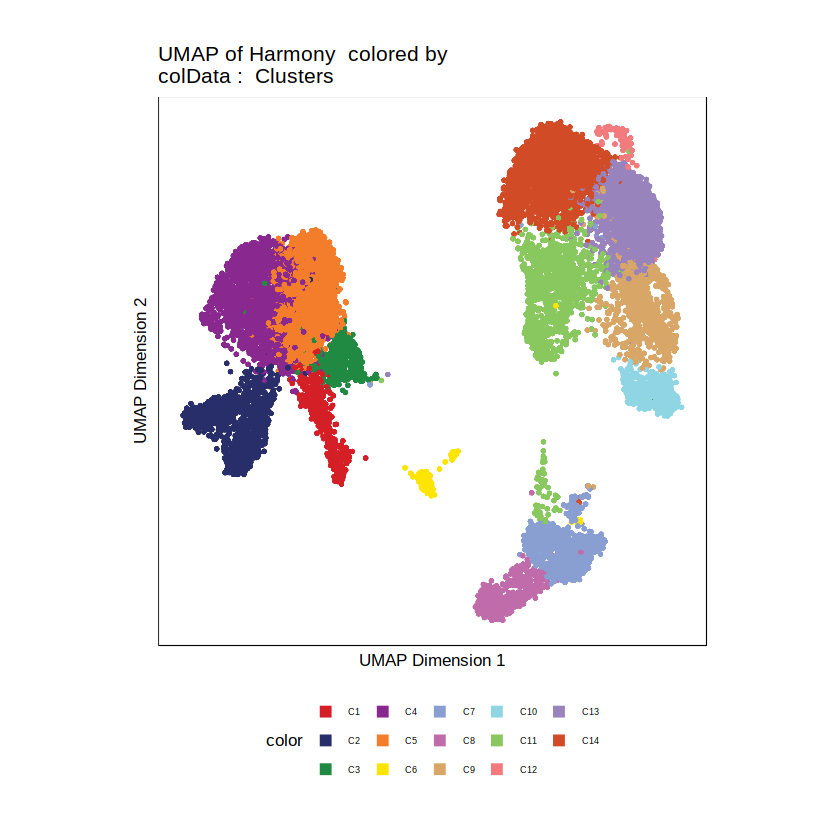

In [9]:
p1 <- plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F)
p1 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-3b691d3d239b56-Date-2022-10-31_Time-12-42-06.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-3b691d3d239b56-Date-2022-10-31_Time-12-42-06.log



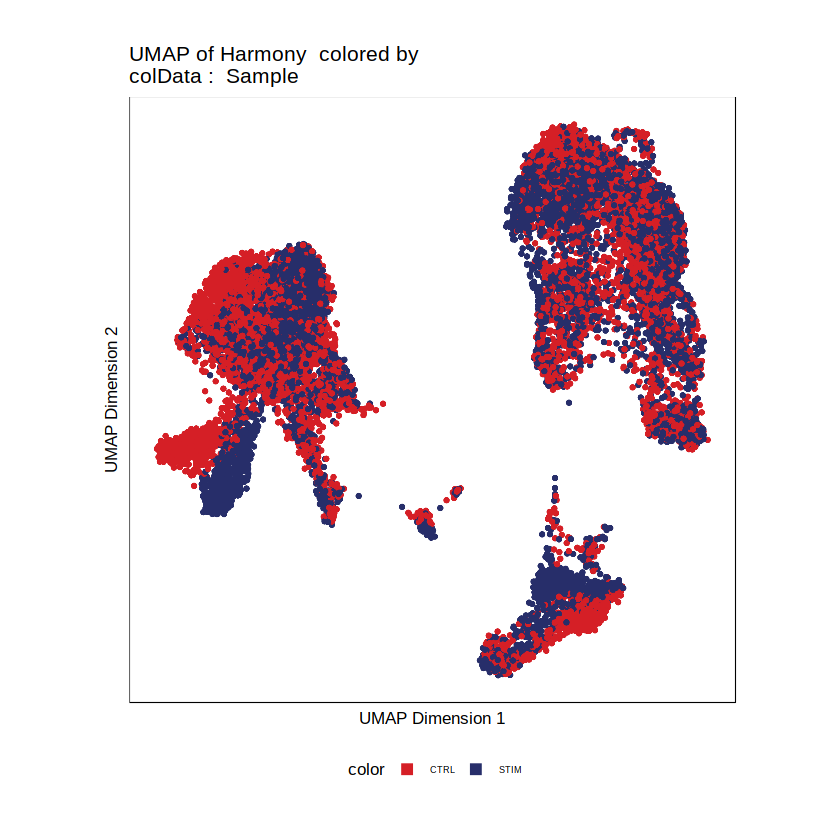

In [10]:
p2 <- plotEmbedding(proj, name = "Sample", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F)
p2 

In [11]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.6 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] harmony_0.1.0                     Rcpp_1.0.9                       
 [3] nabor_0.5.0                       BSgenome.Hsapiens.UCSC.hg19_1.4.3
 [5] BSgenome_1.60.0                   rtracklayer_1.52.1               
 [7] Biostrings_2.60.2                 XVecto